Milestone-1

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("GlobalWeatherRepository.csv")

#Dispaly the first five rows of the data
df.head()

country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
1      Albania            Tirana     41.33      19.82   Europe/Tirane   
2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
4       Angola            Luanda     -8.84      13.23   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius  \
0          1715849100  16-05-2024 13:15                 26.6   
1          1715849100  16-05-2024 10:45                 19.0   
2          1715849100  16-05-2024 09:45                 23.0   
3          1715849100  16-05-2024 10:45                  6.3   
4          1715849100  16-05-2024 09:45                 26.0   

   temperature_fahrenheit condition_text  ...  air_quality_PM2.5  \
0                    79.8  Partly Cloudy  ...                8.4   
1                    66.2  Partly cloudy  ...                1.1   
2                    73.4          Sunny  ...               10.4   
3                    43.3  Light drizzle  ...                0.7   
4                    78.8  Partly cloudy  ...              183.4   

   air_quality_PM10  air_quality_us-epa-index air_quality_gb-defra-index  \
0              26.6                         1                          1   
1               2.0                         1                          1   
2              18.4                         1                          1   
3               0.9                         1                          1   
4             262.3                         5                         10   

   sunrise   sunset  moonrise   moonset      moon_phase  moon_illumination  
0  4:50 AM  6:50 PM  12:12 PM   1:11 AM  Waxing Gibbous                 55  
1  5:21 AM  7:54 PM  12:58 PM   2:14 AM  Waxing Gibbous                 55  
2  5:40 AM  7:50 PM   1:15 PM   2:14 AM  Waxing Gibbous                 55  
3  6:31 AM  9:11 PM   2:12 PM   3:31 AM  Waxing Gibbous                 55  
4  6:12 AM  5:55 PM   1:17 PM  12:38 AM  Waxing Gibbous                 55  

[5 rows x 41 columns]

In [2]:
#Display shape and columns 
#-------------------------
print("Shape:",df.shape)
print("\nColumns:",df.columns.tolist())

Shape: (88468, 41)

Columns: ['country', 'location_name', 'latitude', 'longitude', 'timezone', 'last_updated_epoch', 'last_updated', 'temperature_celsius', 'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph', 'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in', 'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius', 'feels_like_fahrenheit', 'visibility_km', 'visibility_miles', 'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination']


In [9]:
#Get a Dataset info
#------------------
print("\n--- Dataset Info ---")
print(df.info())


#Get a summary stats for nummerical columns
#------------------------------------------
print("\n--- Dataset summery ---")
print(df.describe())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88468 entries, 0 to 88467
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       88468 non-null  object 
 1   location_name                 88468 non-null  object 
 2   latitude                      88468 non-null  float64
 3   longitude                     88468 non-null  float64
 4   timezone                      88468 non-null  object 
 5   last_updated_epoch            88468 non-null  int64  
 6   last_updated                  88468 non-null  object 
 7   temperature_celsius           88468 non-null  float64
 8   temperature_fahrenheit        88468 non-null  float64
 9   condition_text                88468 non-null  object 
 10  wind_mph                      88468 non-null  float64
 11  wind_kph                      88468 non-null  float64
 12  wind_degree                   88468 no

In [3]:
#Missing vlaues
print("Missing values per column:\n",df.isnull().sum());

Missing values per column:
 country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone   

In [11]:
# Number of countries
print("Unique countries:", df['country'].nunique())


Unique countries: 210


In [4]:
#Unit Conversion / Remove Duplicate Units
#Dropping columns with same measurement in two different units
#Keep only one unit for each measurement (Celsius, km/h, mm, mb, km)
df.drop(columns=[
    'temperature_fahrenheit', 'feels_like_fahrenheit',
    'wind_mph', 'gust_mph',
    'pressure_in', 'precip_in',
    'visibility_miles'
], inplace=True)

print("Remaining columns:", df.columns.tolist())

Remaining columns: ['country', 'location_name', 'latitude', 'longitude', 'timezone', 'last_updated_epoch', 'last_updated', 'temperature_celsius', 'condition_text', 'wind_kph', 'wind_degree', 'wind_direction', 'pressure_mb', 'precip_mm', 'humidity', 'cloud', 'feels_like_celsius', 'visibility_km', 'uv_index', 'gust_kph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination']


In [5]:
#Date Handling
#-------------

# Convert last_updated to datetime
df['last_updated'] = pd.to_datetime(df['last_updated'], errors='coerce', dayfirst=False)

# Drop rows where datetime conversion failed
df = df.dropna(subset=['last_updated'])

# Reset index for safety

df = df.reset_index(drop=True)

print("--- Datetime conversion done --- ")
print(df[['last_updated', 'country']].head())

--- Datetime conversion done --- 
         last_updated      country
0 2024-05-16 13:15:00  Afghanistan
1 2024-05-16 10:45:00      Albania
2 2024-05-16 09:45:00      Algeria
3 2024-05-16 10:45:00      Andorra
4 2024-05-16 09:45:00       Angola


C:\Users\kotta\AppData\Local\Temp\ipykernel_7188\2667639878.py:5: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['last_updated'] = pd.to_datetime(df['last_updated'], errors='coerce', dayfirst=False)


In [6]:
#Aggregation
#-----------
# Aggregate daily → monthly averages per country
monthly_df = (
    df.groupby([df['last_updated'].dt.to_period('M'), 'country'])
      .mean(numeric_only=True)
      .reset_index()
)

# Rename column
monthly_df.rename(columns={'last_updated': 'year_month'}, inplace=True)
monthly_df['year_month'] = monthly_df['year_month'].astype(str)

print(" --- Monthly Aggregation Done ---")
monthly_df.head()


 --- Monthly Aggregation Done ---


year_month      country  latitude  longitude  last_updated_epoch  \
0    2024-05  Afghanistan     34.52      69.18        1.716478e+09   
1    2024-05      Albania     41.33      19.82        1.716478e+09   
2    2024-05      Algeria     36.76       3.05        1.716478e+09   
3    2024-05      Andorra     42.50       1.52        1.716478e+09   
4    2024-05       Angola     -8.84      13.23        1.716478e+09   

   temperature_celsius   wind_kph  wind_degree  pressure_mb  precip_mm  ...  \
0            20.305882  11.517647   127.941176  1010.000000   0.108824  ...   
1            25.647059  13.076471   287.647059  1012.235294   0.295294  ...   
2            26.117647  22.617647   182.352941  1013.352941   0.000588  ...   
3            12.423529   9.876471   238.235294  1013.000000   0.351765  ...   
4            29.088235  19.594118   266.294118  1009.470588   0.000000  ...   

    gust_kph  air_quality_Carbon_Monoxide  air_quality_Ozone  \
0  16.141176                  1424.094118          77.452941   
1  18.752941                   198.223529          87.723529   
2  28.741176                   233.758824         113.935294   
3  12.617647                   151.570588          68.900000   
4  28.670588                   730.600000         105.900000   

   air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  \
0                     16.400000                     0.588235   
1                      3.511765                     0.447059   
2                     10.952941                     3.382353   
3                      0.741176                     0.141176   
4                     11.517647                     5.976471   

   air_quality_PM2.5  air_quality_PM10  air_quality_us-epa-index  \
0           7.894118         17.411765                  1.000000   
1          10.270588         24.552941                  1.352941   
2           8.682353         18.005882                  1.117647   
3           0.929412          1.211765                  1.000000   
4          45.241176         92.688235                  2.529412   

   air_quality_gb-defra-index  moon_illumination  
0                    1.117647          78.647059  
1                    1.588235          78.647059  
2                    1.117647          78.647059  
3                    1.000000          78.647059  
4                    4.352941          78.647059  

[5 rows x 25 columns]

In [7]:
#Yearly Aggregation 
# Extract Year from last_updated
df['year'] = df['last_updated'].dt.year

# Aggregate daily → yearly averages per country
yearly_df = (
    df.groupby(['year', 'country'])
      .mean(numeric_only=True)
      .reset_index()
)

print("--- Yearly Aggregation Done ---")
yearly_df.head()

--- Yearly Aggregation Done ---


year      country   latitude  longitude  last_updated_epoch  \
0  2024  Afghanistan  34.518703  69.181297        1.725745e+09   
1  2024      Albania  41.329017  19.819568        1.725745e+09   
2  2024      Algeria  36.761224   3.050237        1.725762e+09   
3  2024      Andorra  42.500000   1.518703        1.725745e+09   
4  2024       Angola  -8.839332  13.231729        1.725745e+09   

   temperature_celsius   wind_kph  wind_degree  pressure_mb  precip_mm  ...  \
0            22.696943  12.113974    99.257642  1008.096070   0.038603  ...   
1            25.022271  11.429694   237.855895  1014.899563   0.169651  ...   
2            25.154386  15.312719   174.412281  1017.035088   0.025351  ...   
3            14.105677   9.516594   211.502183  1017.965066   0.147860  ...   
4            26.335808  13.153712   260.231441  1012.550218   0.030044  ...   

    gust_kph  air_quality_Carbon_Monoxide  air_quality_Ozone  \
0  15.079476                   774.743013         107.629258   
1  15.961572                   257.638646          83.346288   
2  20.516228                   307.305263          88.343860   
3  11.872052                   177.131659          64.942358   
4  19.632314                   690.936900         117.070306   

   air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  \
0                      7.655328                     7.974389   
1                     10.230000                     4.604236   
2                     30.107917                    12.673136   
3                      0.616790                     0.162074   
4                      9.025524                     8.001550   

   air_quality_PM2.5  air_quality_PM10  air_quality_us-epa-index  \
0          14.860000         28.745873                  1.388646   
1          13.593777         18.724323                  1.349345   
2          18.584364         35.214364                  1.574561   
3           3.729760          7.693100                  1.030568   
4          47.178341         82.926769                  2.484716   

   air_quality_gb-defra-index  moon_illumination  
0                    1.772926          48.672489  
1                    1.672489          48.606987  
2                    2.122807          48.394737  
3                    1.048035          48.606987  
4                    4.301310          48.606987  

[5 rows x 25 columns]

In [8]:
#Save Aggregated Datasets

# Save both aggregated datasets
monthly_df.to_csv("Monthly_GlobalWeather.csv", index=False)
yearly_df.to_csv("Yearly_GlobalWeather.csv", index=False)

print(" Saved as Monthly_GlobalWeather.csv and Yearly_GlobalWeather.csv")


 Saved as Monthly_GlobalWeather.csv and Yearly_GlobalWeather.csv


Milestone-1 completed

Milestone-2

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import warnings
warnings.filterwarnings("ignore")

#Task-1:Statistical Analysis

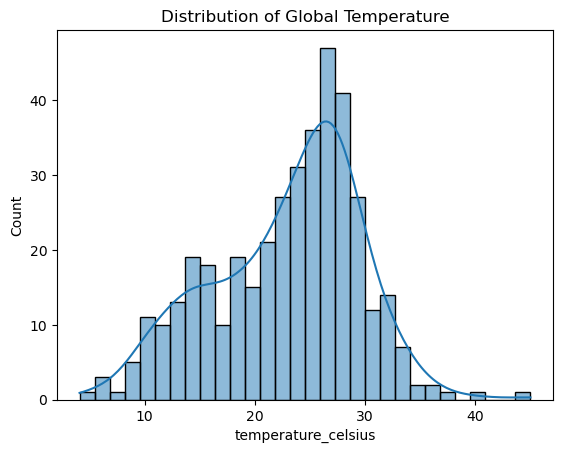

In [19]:
#Histogram for temperature
sns.histplot(yearly_df['temperature_celsius'],bins=30,kde=True)
plt.title("Distribution of Global Temperature")
plt.show()

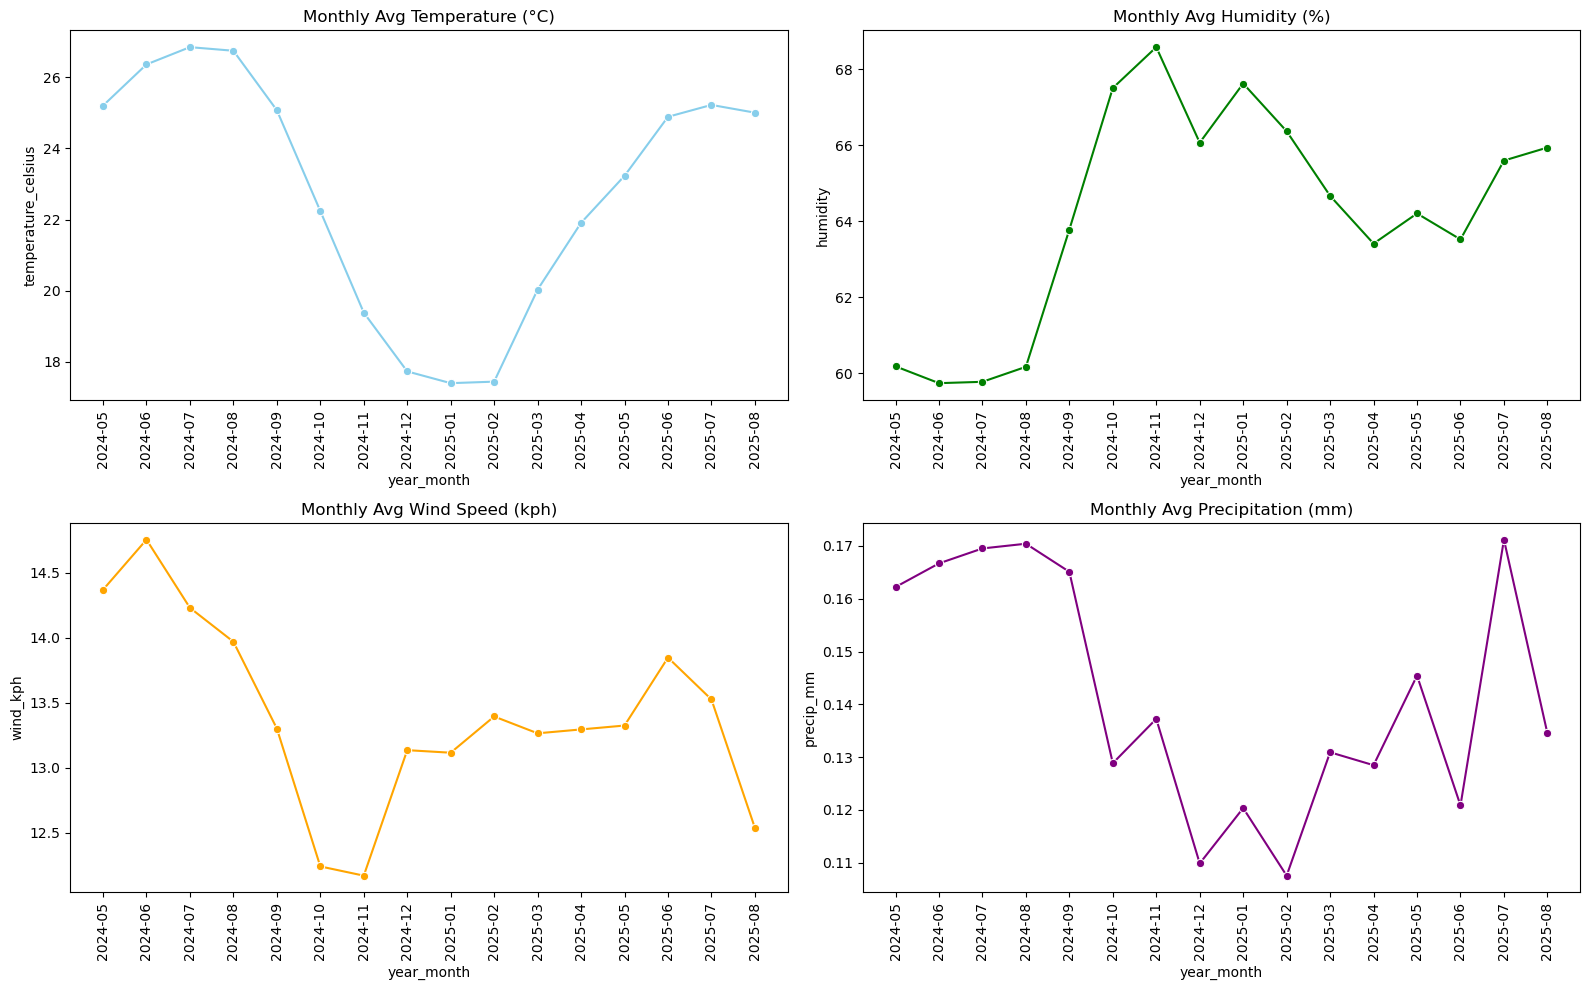

In [15]:
#Monthly average climate trends 
monthly_avg = (monthly_df.groupby('year_month')[['temperature_celsius','humidity','wind_kph','precip_mm']]
               .mean()
               .reset_index())

fig, axes = plt.subplots(2, 2, figsize=(16,10))

# Temperature
sns.lineplot(ax=axes[0,0], data=monthly_avg, x="year_month", y="temperature_celsius", marker="o", color="skyblue")
axes[0,0].set_title("Monthly Avg Temperature (°C)")
axes[0,0].tick_params(axis='x',rotation=90)

# Humidity
sns.lineplot(ax=axes[0,1], data=monthly_avg, x="year_month", y="humidity", marker="o", color="green")
axes[0,1].set_title("Monthly Avg Humidity (%)")
axes[0,1].tick_params(axis='x',rotation=90)

# Wind Speed
sns.lineplot(ax=axes[1,0], data=monthly_avg, x="year_month", y="wind_kph", marker="o", color="orange")
axes[1,0].set_title("Monthly Avg Wind Speed (kph)")
axes[1,0].tick_params(axis='x',rotation=90)

# Rainfall
sns.lineplot(ax=axes[1,1], data=monthly_avg, x="year_month", y="precip_mm", marker="o", color="purple")
axes[1,1].set_title("Monthly Avg Precipitation (mm)")
axes[1,1].tick_params(axis='x',rotation=90)

plt.tight_layout()
plt.show()

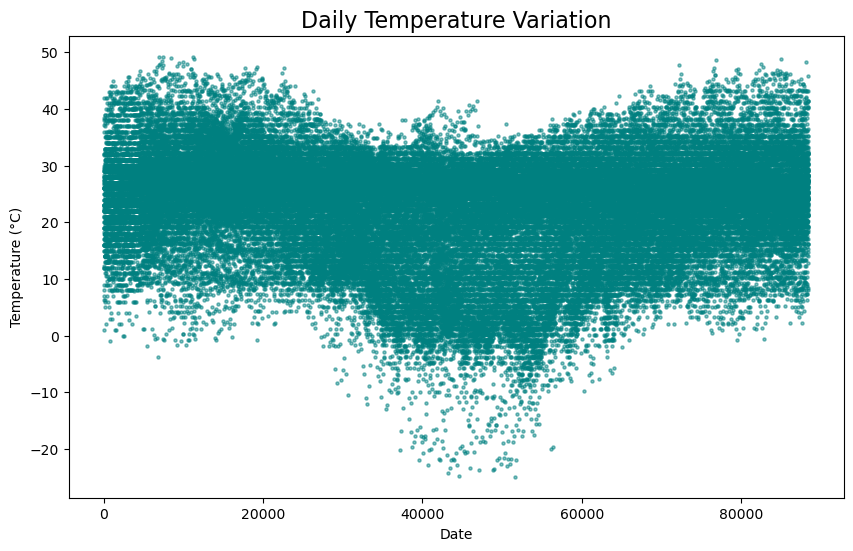

In [21]:
#Daily Temperature distribution
plt.figure(figsize=(10,6))
plt.scatter(df.index, df['temperature_celsius'], s=5, alpha=0.5, color="teal")
plt.title("Daily Temperature Variation", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()

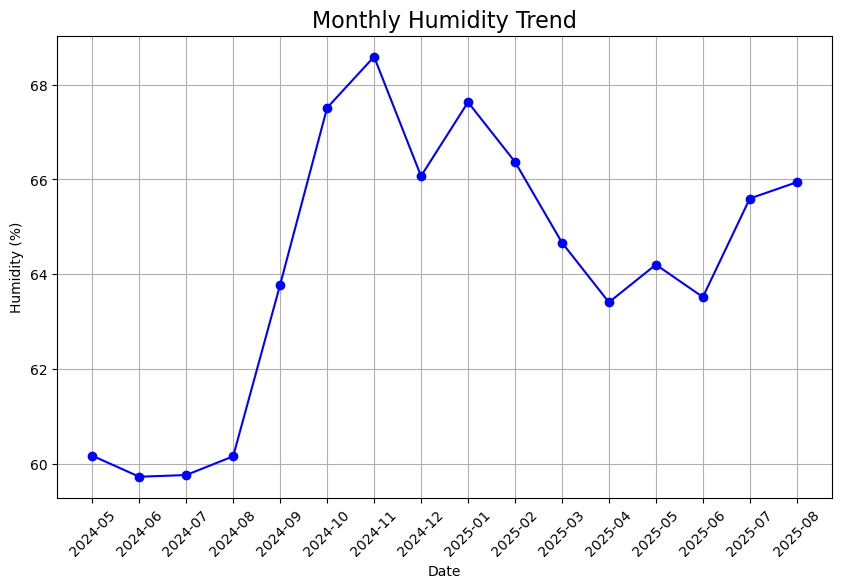

In [16]:
#monthly Humidity trend
plt.figure(figsize=(10,6))
plt.plot(monthly_avg['year_month'], monthly_avg['humidity'], marker='o', color="blue")

plt.title("Monthly Humidity Trend", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Humidity (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

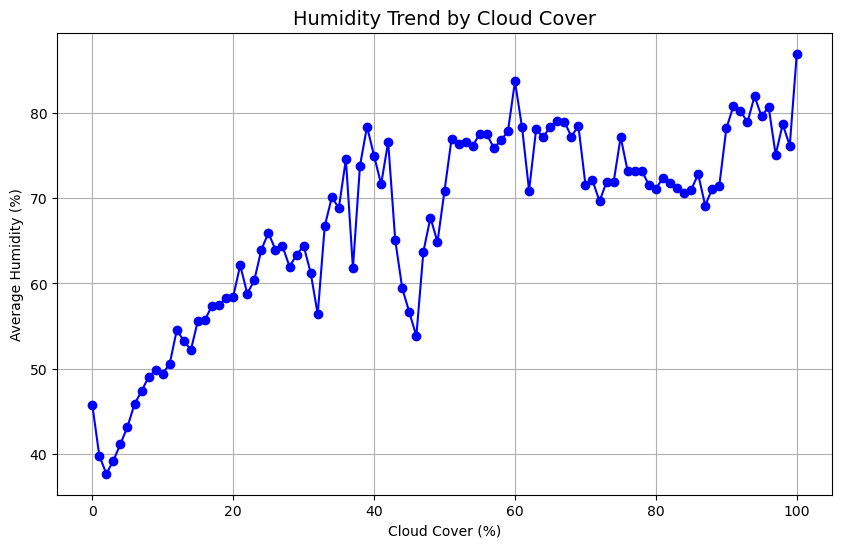

In [17]:
# Group by cloud cover and compute average humidity
cloud_humidity = df.groupby('cloud')['humidity'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(cloud_humidity['cloud'], cloud_humidity['humidity'], marker='o', color="blue")

plt.title("Humidity Trend by Cloud Cover", fontsize=14)
plt.xlabel("Cloud Cover (%)")
plt.ylabel("Average Humidity (%)")
plt.grid(True)
plt.show()

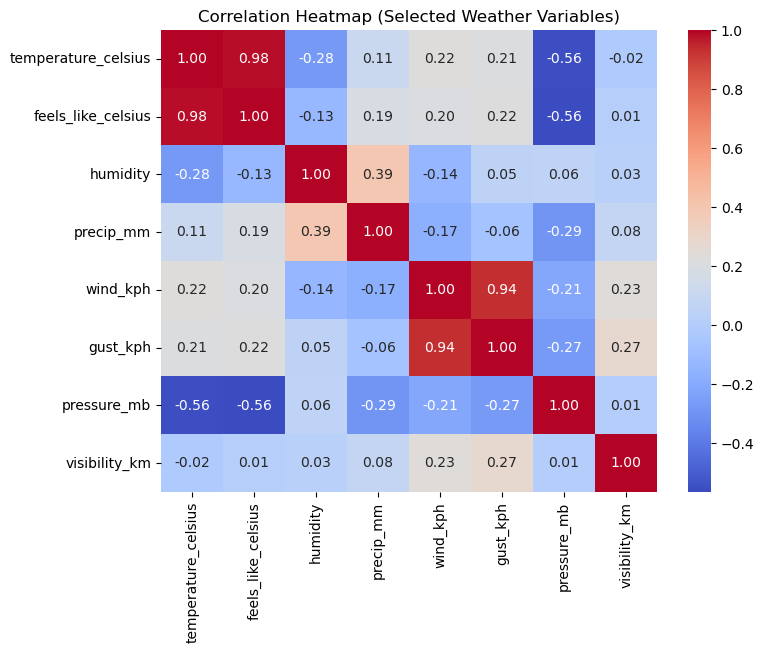

In [18]:
#Heatmap on selected weather variables
selected_cols = ['temperature_celsius','feels_like_celsius',
                 'humidity','precip_mm','wind_kph','gust_kph',
                 'pressure_mb','visibility_km']
corr = yearly_df[selected_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Selected Weather Variables)")
plt.show()

#TASK-2
#identify extreme weather events

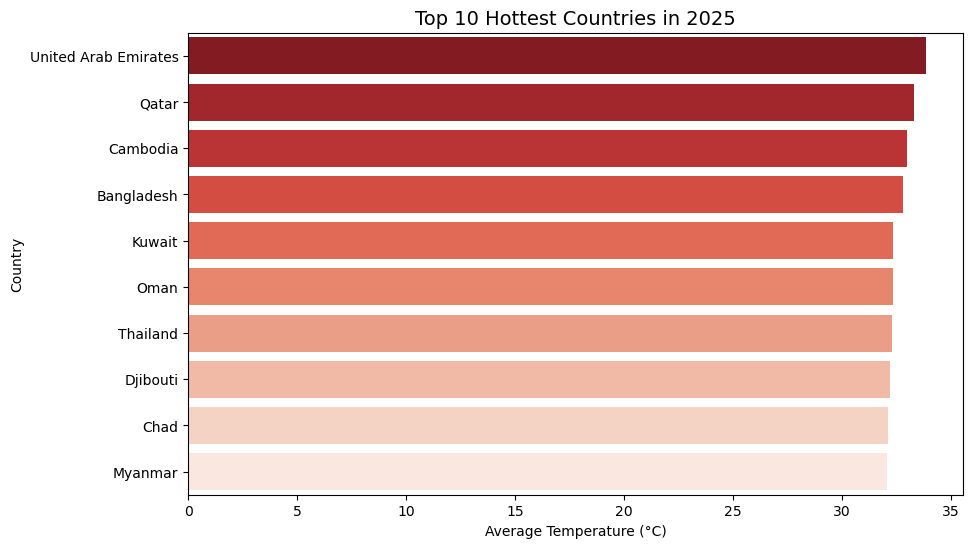

In [20]:
# Top 10 hottest countries 
latest_year = yearly_df['year'].max()
hottest = (yearly_df[yearly_df['year'] == latest_year]
           .groupby('country')['temperature_celsius']
           .mean()
           .sort_values(ascending=False)
           .head(10))

plt.figure(figsize=(10,6))
sns.barplot(x=hottest.values, y=hottest.index, palette="Reds_r")
plt.title(f"Top 10 Hottest Countries in {latest_year}", fontsize=14)
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Country")
plt.show()

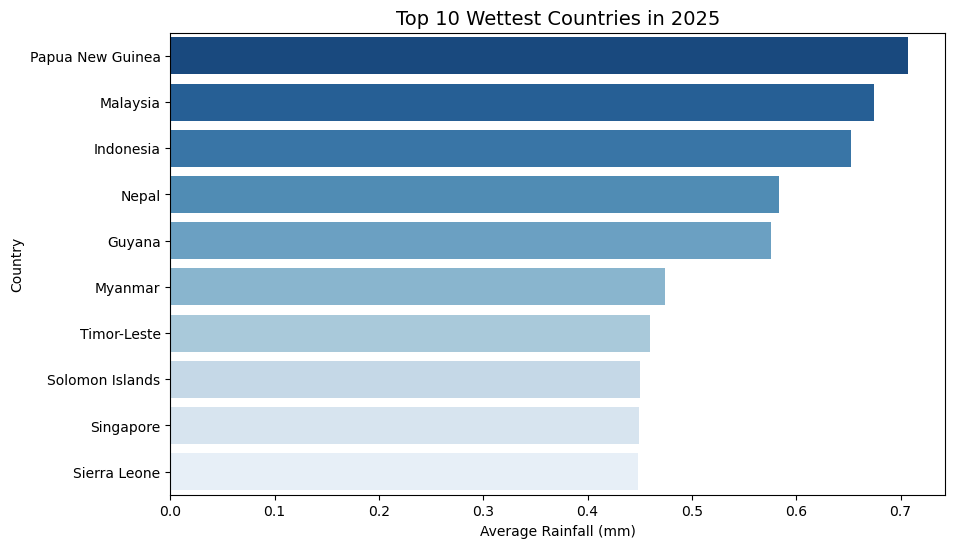

In [21]:
# Top 10 highest rainfall countries (latest year)
wettest = (yearly_df[yearly_df['year'] == latest_year]
           .groupby('country')['precip_mm']
           .mean()
           .sort_values(ascending=False)
           .head(10))

plt.figure(figsize=(10,6))
sns.barplot(x=wettest.values, y=wettest.index, palette="Blues_r")
plt.title(f"Top 10 Wettest Countries in {latest_year}", fontsize=14)
plt.xlabel("Average Rainfall (mm)")
plt.ylabel("Country")
plt.show()

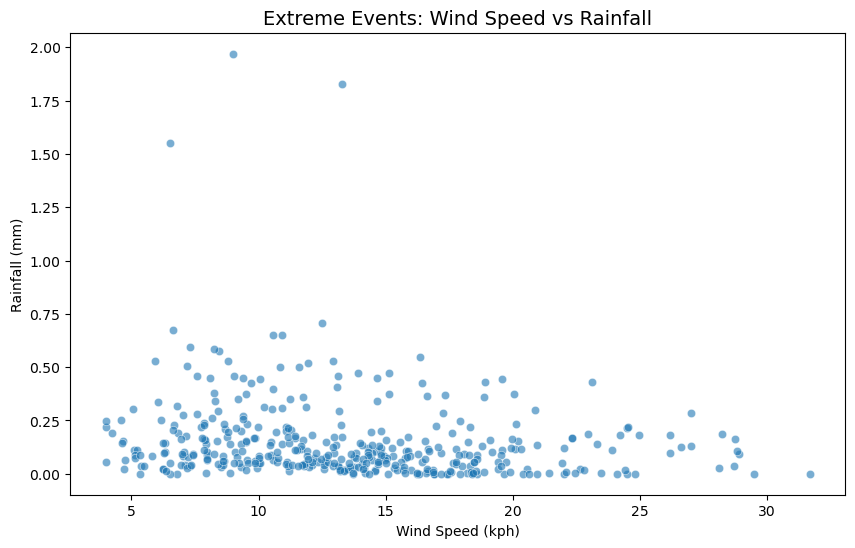

In [22]:
# Scatter plot of wind speed vs rainfall
plt.figure(figsize=(10,6))
sns.scatterplot(x='wind_kph', y='precip_mm', data=yearly_df, alpha=0.6)
plt.title("Extreme Events: Wind Speed vs Rainfall", fontsize=14)
plt.xlabel("Wind Speed (kph)")
plt.ylabel("Rainfall (mm)")
plt.show()

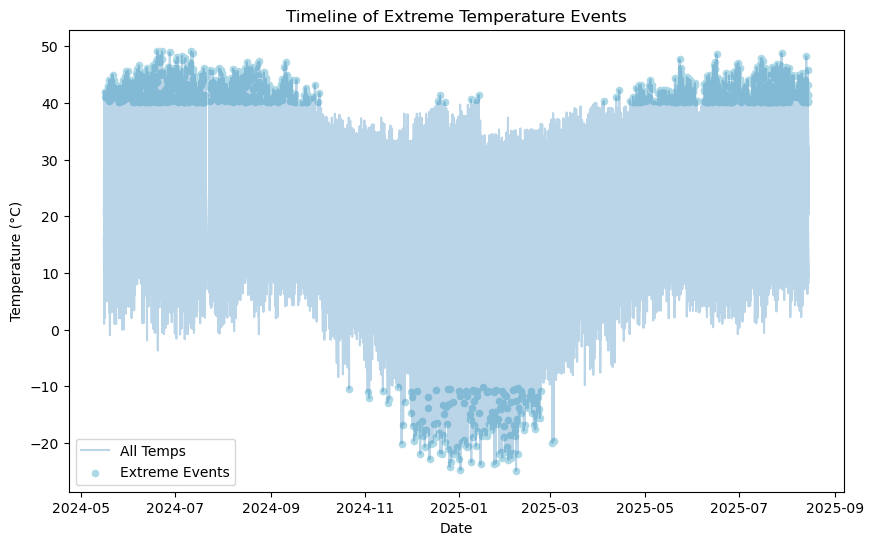

In [11]:
# Filter extreme days
extreme_days = df[(df['temperature_celsius'] > 40) | (df['temperature_celsius'] < -10)]

plt.figure(figsize=(10,6))
plt.plot(df['last_updated'], df['temperature_celsius'], alpha=0.3, label="All Temps")
plt.scatter(extreme_days['last_updated'], extreme_days['temperature_celsius'], 
            color="lightblue", label="Extreme Events", s=20)
plt.title("Timeline of Extreme Temperature Events")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

#Task-3

#Compare weather conditions across regions. 

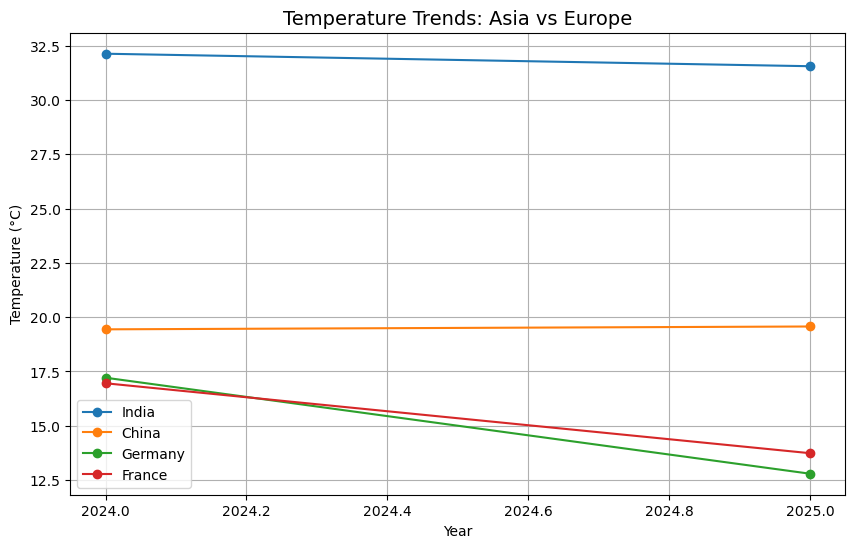

In [24]:
# Pick sample countries (Asia & Europe)
countries = ["India","China","Germany","France"]

plt.figure(figsize=(10,6))
for c in countries:
    country_data = yearly_df[yearly_df['country'] == c]
    plt.plot(country_data['year'], country_data['temperature_celsius'], marker="o", label=c)

plt.title("Temperature Trends: Asia vs Europe", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()

In [29]:
#Task-4

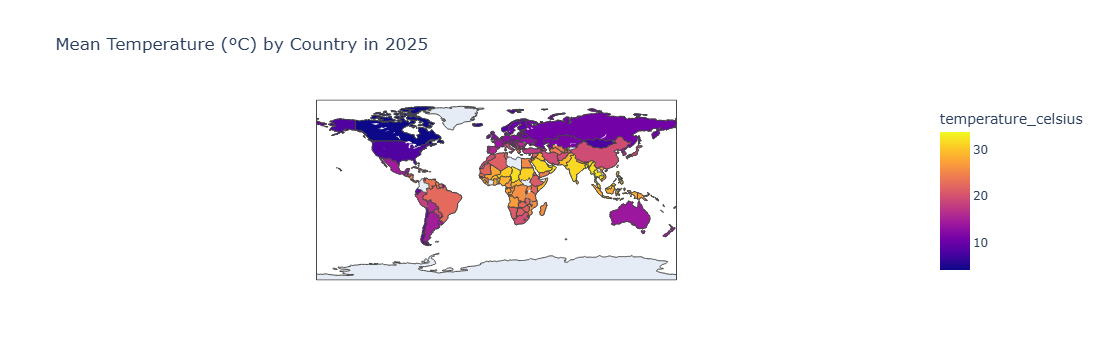

In [28]:
import plotly.express as px

# Get latest year
latest_year = yearly_df['year'].max()

# Average temperature by country
map_temp = (yearly_df[yearly_df['year'] == latest_year]
            .groupby('country', as_index=False)['temperature_celsius']
            .mean())

# Choropleth Map
fig = px.choropleth(
    map_temp,
    locations="country",
    locationmode="country names",
    color="temperature_celsius",
    color_continuous_scale="plasma",
    title=f"Mean Temperature (°C) by Country in {latest_year}"
)
fig.show()

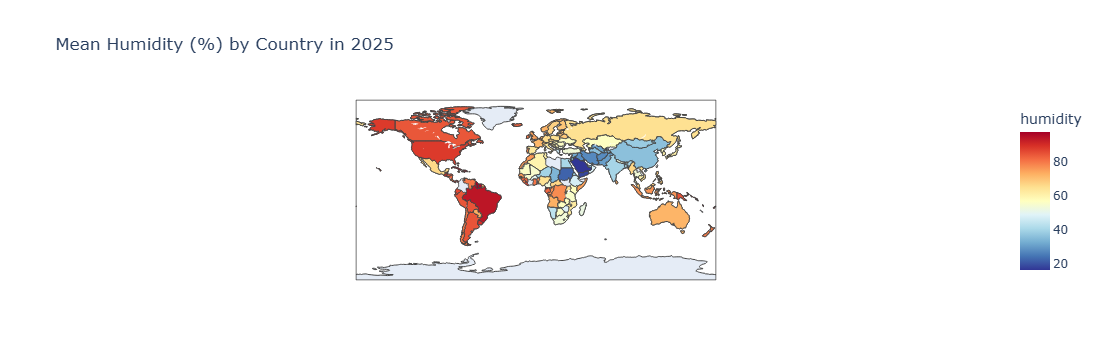

In [31]:
map_humidity = (yearly_df[yearly_df['year'] == latest_year]
                .groupby('country', as_index=False)['humidity']
                .mean())

fig = px.choropleth(
    map_humidity,
    locations="country",
    locationmode="country names",
    color="humidity",
    color_continuous_scale="RdYlBu_r",
    title=f"Mean Humidity (%) by Country in {latest_year}"
)
fig.show()

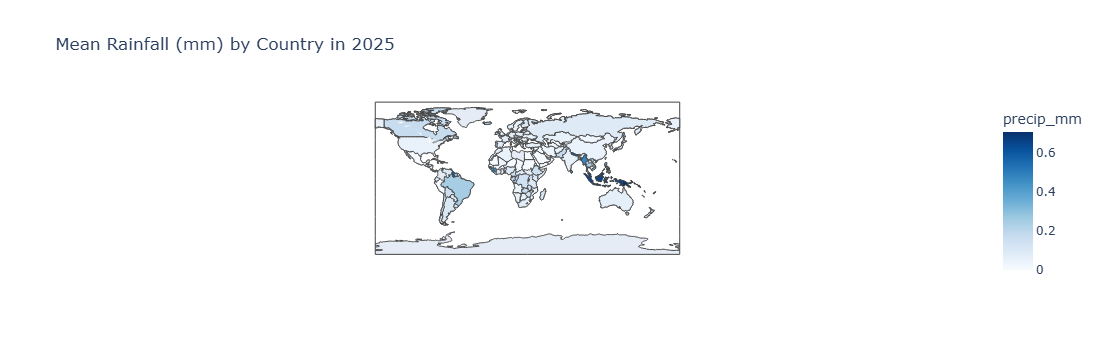

In [34]:
map_rain = (yearly_df[yearly_df['year'] == latest_year]
            .groupby('country', as_index=False)['precip_mm']
            .mean())

fig = px.choropleth(
    map_rain,
    locations="country",
    locationmode="country names",
    color="precip_mm",
    color_continuous_scale="Blues",
    title=f"Mean Rainfall (mm) by Country in {latest_year}"
)
fig.show()

#Milestone2 completed